# Welcome to SHASUMMM

#### Loading the Data

In [95]:
import numpy as np
from numpy import savetxt
from numpy import genfromtxt
from pathlib import Path
import sklearn
import librosa
import librosa.display
import os
import pandas as pd
import matplotlib.pyplot as plt
import pickle
#print('Get current file name :    ', __file__)

from sklearn.model_selection import cross_val_score

## ML 
from sklearn.svm import SVC # Support Vector Machine (SVM)
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent (SGD)
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_predict


print("Complete")

Complete


In [4]:
# convert all audio files inside a given folder into WMA format - not recursive to child-folders
#!sudo apt-get install ffmpeg lame flac vorbis-tools
#INPUT_DIR = 'Music/Stadt mit K [1]'
#!ftransc -f wma --directory INPUT_DIR

# Import wav file

In [5]:
File_name = "Sample_1"
Folder = r"\1_Stadt_mit_K" 
File_path = r'Path\CS50\Mel_Spectograms'
Class = 1

# setting working directory
INPUT_DIR = r'Path\CS50\Music' + Folder
OUTPUT_DIR = File_path + Folder

print(os.listdir(INPUT_DIR)) 
print(os.listdir(OUTPUT_DIR)) 

if os.getcwd() != OUTPUT_DIR:
    os.chdir(OUTPUT_DIR)
print('Get current working directory :  ', os.getcwd())

# test = r'C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms\7_so_lang_mer_noch_am_lebe_sind\Sample_1'

['Sample_1.wav', 'Sample_2.wav', 'Sample_3.wav', 'Sample_4.wav', 'Sample_5.wav', 'Sample_6.wav', 'Sample_7.wav', 'Sample_8.wav']
['finalized_model.sav', 'Sample_1.csv', 'Sample_2.csv', 'Sample_3.csv', 'Sample_4.csv', 'Sample_5.csv', 'Sample_6.csv', 'Sample_7.csv', 'Sample_8.csv']
Get current working directory :   C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms\1_Stadt_mit_K


# Visualize wav

C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Music\1_Stadt_mit_K\Sample_8.wav


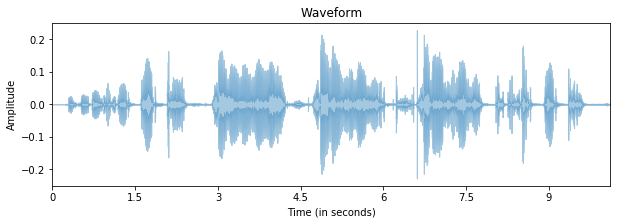

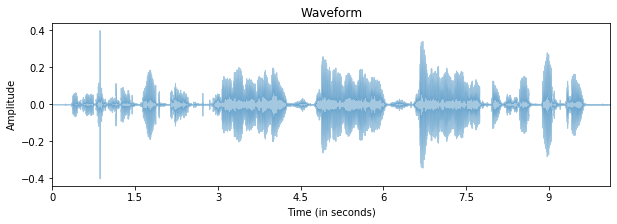

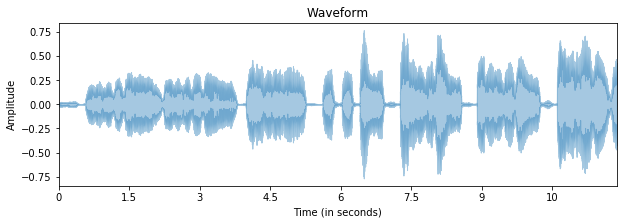

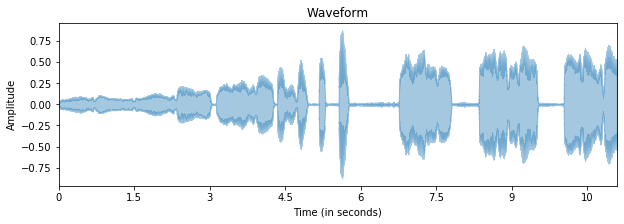

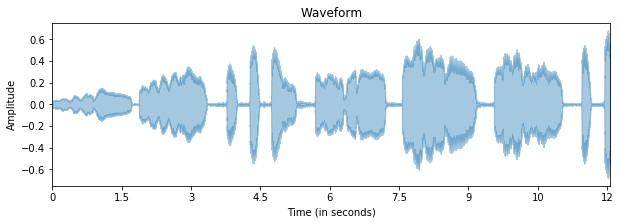

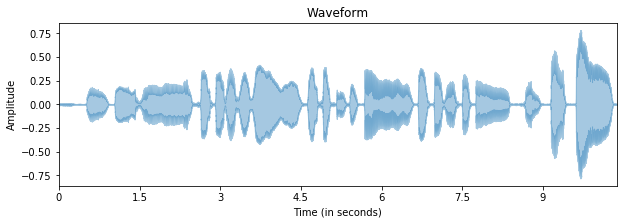

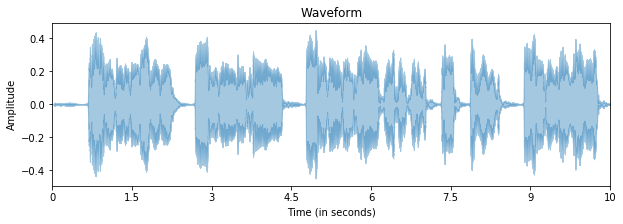

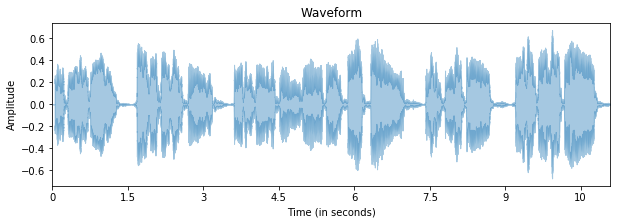

In [93]:
### Loading a wav file ###

# Loading a wav file using librosa and displaying the waveform
# load the wav files to monophonic signal with a default sampling rate of 22050.

# https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5

files = Path(INPUT_DIR).glob('*')
for file in files:
    
    signal, sample_rate = librosa.load(file, sr=22050)
    plt.figure(figsize=(10,3))
    librosa.display.waveplot(signal, sample_rate, alpha=0.4)
    plt.xlabel("Time (in seconds)")
    plt.ylabel("Amplitude")
    plt.title("Waveform")

In [7]:
from IPython.display import Audio
Audio(file)

In [161]:
signal, sample_rate = librosa.load(file, sr=22050)
print("Sampling rate:", sample_rate)
print("The file consist of an np.array with", len(signal), "datapoints!")

Sampling rate: 22050
The file consist of an np.array with 244608 datapoints!


## Spectogram

C:\Users\marlo\anaconda3\lib\site-packages\librosa\display.py:955: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


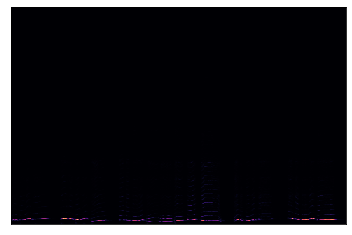

In [9]:
sgram = librosa.stft(signal)
librosa.display.specshow(sgram)

## Conversion to Mel Spectogram

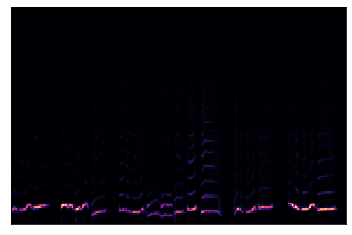

In [10]:
# use the mel-scale instead of raw frequency on the y-axis
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

## Mel Spec

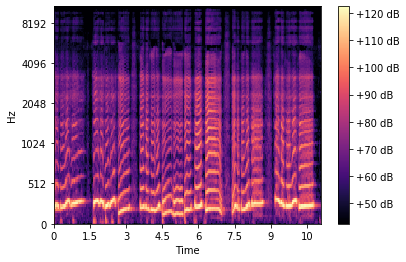

In [63]:
files = Path(INPUT_DIR).glob('*')
Mel_Specs = {}

for file in files:
    signal, sample_rate = librosa.load(file, sr=22050)
    
    # Spectogram
    sgram = librosa.stft(signal)
    
    # Adjustment
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    
    # Mel Spec
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    Mel_Specs[file] = mel_sgram
    
librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [68]:
X=[]
List = []

a, b= mel_sgram.shape
columns = int(b - 436)
if columns != 0:
    for i in range(0, columns):
        mel_sgram = np.delete(mel_sgram, [436], axis=1)
            
            
for j in range(0, len(mel_sgram)):
    for z in range (0, len(mel_sgram[0])):
        List.append(mel_sgram[j][z])
        count += 1      
Array = np.array(List)
X.append(Array)
X = np.array(X)


(1, 55808)
55808


244608
<class 'numpy.ndarray'>
MFCC is of type <class 'numpy.ndarray'> with shape (20, 478)


C:\Users\marlo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\marlo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


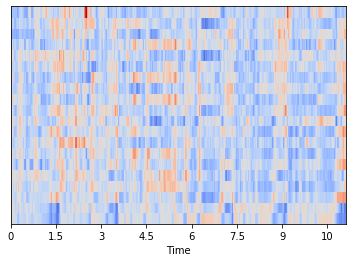

In [12]:
# for file in files:

signal, sample_rate = librosa.load(file, sr=22050)
print(len(signal))
print(type(signal))
mfcc = librosa.feature.mfcc(signal, sr=sample_rate)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type <class 'numpy.ndarray'> with shape (20, 134)



### Image Saving

In [13]:
for i, (file, value) in enumerate(Mel_Specs.items()):
    print(File_name)
    # df.loc[len(df.index)] = [File_path, Folder, File_name, Class]
    #savetxt(str(File_name) + '.csv', value, delimiter=',')
    File_name = File_name.replace(str(i+1), str(i+2))
print("Finished")

Sample_1
Sample_2
Sample_3
Sample_4
Sample_5
Sample_6
Sample_7
Sample_8
Finished


## Uploading Mel Specs




In [15]:
'''Using random samples to observe difference in waveforms.'''
# https://automatetheboringstuff.com/chapter9/

# Creatin the Dictonary
dic = {}
Classes =[]
Datapoints = []

Class = 0
#    path = str(fold[i]) + '/' + arr[i] + ".csv"
#    test_2 = "7_so_lang_mer_noch_am_lebe_sind\Sample_1.csv"
for folderName, subfolders, filenames in os.walk(r'C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms'):
        #for filename in filenames:
    print("Filepath: ", folderName)             
    for filename in filenames:
        my_data = genfromtxt(filename, delimiter=',')
        Datapoints.append(my_data)
        Classes.append(Class)
        
        """
        # Plotting         
        plt.figure(figsize=(20, 10))
        plt.subplot(4, 2, 1)
        librosa.display.specshow(my_data, y_axis='linear')
        plt.colorbar(format='%+2.0f dB')
        plt.title(folderName)
        """
    Class += 1
dic["data"] = Datapoints    
dic["class"] = Classes
X_train = Datapoints
y = Classes

Filepath:  C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms
Filepath:  C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms\1_Stadt_mit_K
Filepath:  C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms\2_Echte_Fruende
Filepath:  C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms\3_Köllsche_Jung
Filepath:  C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms\4_et_jitt_kein_Wood
Filepath:  C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms\5_leev_marie
Filepath:  C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms\6_superjeilezick
Filepath:  C:\Users\marlo\Desktop\Anaconda\Excercises\CS50\Mel_Spectograms\7_so_lang_mer_noch_am_lebe_sind


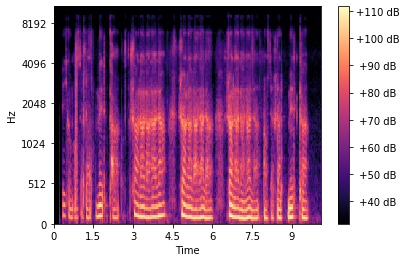

In [16]:
# dic["class"] = np.array(dic["class"])
#X ,y = dic["data"], dic["class"]
# image = X_train[0]. reshape(128, 486)

librosa.display.specshow(X_train[1], sr=sample_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+4.0f dB')

## Test and Train Data

### Train test Split

In [17]:
#X_train, X_test, y_train, y_test = df["Np.array"], df_test["Np.array"], df["Class"], df_test["Class"]
X = []
shortest = 70000
for i in range(0, int(len(X_train))):
    a, b = X_train[i].shape
    # X_train[i] = X_train[i].reshape(length, )
    if b < shortest:
        shortest = b
    #print(X_train[i].shape)
print("shortest:", shortest)
print(len(X_train))
print(len(y))

shortest: 436
47
47


# Handle length

In [18]:
for i in range(0, int(len(X_train))):
    a, b= X_train[i].shape
    # print("Columns before: ", b)
    columns = int(b - shortest)
    # print("Difference: ",columns)
    if columns != 0:
        #X_train[1] = np.delete(X_train[1], [i for i in range(shortest, b)], axis=1)
        for j in range(0, columns):
            X_train[i] = np.delete(X_train[i], [444], axis=1)
    row, column = X_train[i].shape
    # print("Columns after: ", column)
print("Complete")
"""
for i in range(0, Length):

    X_train[0] = np.append(X_train[0])
print(X_train[0])
a = X_train[0].shape
print(a)
"""

C:\Users\marlo\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
  if __name__ == '__main__':


Colmplete


'\nfor i in range(0, Length):\n\n    X_train[0] = np.append(X_train[0])\nprint(X_train[0])\na = X_train[0].shape\nprint(a)\n'

In [19]:
Test = 0
for i in range(0, int(len(X_train))):
    a, b = X_train[i].shape
    Test += 1
print(Test)

47


In [20]:
count = 0
X = []
for i in range(0, int(len(X_train))):
    List = []
    for j in range(0, 128):
        for z in range (0, 436):
            List.append(X_train[i][j][z])
            count += 1      
    Array = np.array(List)
    X.append(Array)
X = np.array(X)
print(len(X))

47


In [21]:
#X_train[41][127][443]
#X[0] = X[0].reshape(128, 444)
X_test, X_train = X[:4], X[4:]
y_train = np.array(y)
y_test, y_train = y_train[:4], y_train[4:]
print(len(y_train), len(y_test))
print(len(X_train), len(X_test))

43 4
43 4


In [22]:
print("Train: ",X_train.shape)
print("Train: ", y_train.shape)
print("Test: ", X_test.shape)
print("Test: ", y_test.shape)

Train:  (43, 55808)
Train:  (43,)
Test:  (4, 55808)
Test:  (4,)


In [23]:
X_test

array([[27.91352081, 27.91352081, 27.91352081, ..., 27.91352081,
        27.91352081, 27.91352081],
       [31.71761322, 31.71761322, 31.71761322, ..., 31.71761322,
        31.71761322, 31.71761322],
       [50.79239273, 51.13996887, 45.92753983, ..., 40.65382385,
        40.65382385, 40.65382385],
       [53.86521149, 59.02161407, 58.06085968, ..., 45.60536957,
        45.60536957, 45.60536957]])

In [24]:
y_test

array([1, 1, 1, 1])

In [25]:
for i in range(0, int(len(X_train))):
    X_train[i] = X_train[i].reshape(1, -1)
    
print(X_train.shape)
print(y_train.shape)

(43, 55808)
(43,)


# Train & Test ML Model

In [94]:
# Support Vector Machine (SVM)

# sklearn automatically uses OvO approach
# One-versus-One (OvO) gives the probability for every pair e. g. 0´s and 1´s

svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict(X_test)

array([2, 2, 4, 2])

In [61]:
X_test_scores = svm_clf.decision_function(X_test)
X_test_scores

array([[-0.28571503,  6.27777778,  4.22222039,  5.27777778,  2.99991266,
         1.75000439,  0.75000439],
       [-0.28571459,  6.27777778,  4.22221663,  5.27777778,  2.99992474,
         1.75000439,  0.75000439],
       [-0.28571191,  6.27777778,  4.22223148,  5.27777778,  3.0000813 ,
         0.74999122,  1.74999122],
       [-0.28384883,  6.27777778,  4.22222039,  5.27777778,  3.0000813 ,
         1.74733709,  0.74733709]])

In [28]:
# Forest
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3, method="predict_proba")

## View Accuracy

In [30]:
cross_val_score(forest_clf, X_train, y_train,cv=3, scoring ="accuracy")

array([0.13333333, 0.        , 0.07142857])

In [31]:
cross_val_score(svm_clf, X_train, y_train,cv=3, scoring ="accuracy")

array([0.13333333, 0.14285714, 0.21428571])

In [32]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
#sgd_clf.predict(X_test)

cross_val_score(sgd_clf, X_train, y_train,cv=3, scoring ="accuracy")

array([0.13333333, 0.        , 0.07142857])

In [33]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
#ovr_clf.predict(X_test)

cross_val_score(ovr_clf, X_train, y_train,cv=3, scoring ="accuracy")

array([0.13333333, 0.07142857, 0.07142857])

# Export the Model

In [34]:
svm_clf = SVC()
svm_clf.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
filename = 'finalized_model.sav'
pickle.dump(svm_clf, open(filename, 'wb'))

In [96]:
# load the model from disk
import pickle
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.75


In [127]:
loaded_model.decision_function(X_test)


array([[ 6.26666667,  5.26666667,  3.        ,  4.26666667,  1.77777778,
         0.72222222, -0.27777778],
       [ 6.26666667,  5.26666667,  3.        ,  4.26666667,  1.77777778,
         0.72222222, -0.27777778],
       [ 6.26666667,  5.26666667,  3.        ,  4.26666667,  1.77777778,
         0.72222222, -0.27777778],
       [ 6.26666667,  5.26666667,  3.        ,  4.26666667,  1.77777778,
         0.72222222, -0.27777778]])

In [160]:
for i in X_scores:
    array = i

    temp = array.argsort()

    ranks = np.empty_like(temp)

    ranks[temp] = np.arange(len(array))

    ranks = list(ranks)
    #print(ranks)

    Predictions=[]
    # print(np.where(ranks >= number)[0])
    for j in range(0,3):
        number = ranks.index(max(ranks))

        if number == 0:
            Predictions.append("Stadt mit K")
        if number == 1:
            Predictions.append("Echte Freunde")
        if number == 2:
            Predictions.append("Köllsche Junge")
        if number == 3:
            Predictions.append("Et jitt kein Wood")
        if number == 4:
            Predictions.append("Leev Marie")
        if number == 5:
            Predictions.append("Superjeilezick")
        if number == 6:
            Predictions.append("So Lang mer noch am Lebe sind")

        ranks[(ranks.index(max(ranks)))] = 0

    print(Predictions)

['Superjeilezick', 'So Lang mer noch am Lebe sind', 'Et jitt kein Wood']
['Superjeilezick', 'Et jitt kein Wood', 'So Lang mer noch am Lebe sind']
['Superjeilezick', 'So Lang mer noch am Lebe sind', 'Echte Freunde']
['Superjeilezick', 'Et jitt kein Wood', 'So Lang mer noch am Lebe sind']


## Post submission version with neural net

In [ ]:
# propper sampling
df_train = red_wine.sample(frac=0.7, random_state=0)